In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime as dt

import pandas_profiling

from sklearn.metrics import mean_squared_error

import os

# Задача 1

а) зависимость цены на недвижимость в конкретном регионе от времени, - Временной ряд

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,- Временной ряд

в) количество отказов компьютера, - Временной ряд, если по какому то отрезку времени

г) число обращений в поликлинику по району, - Не временной ряд

д) координаты автобуса при движении по маршруту,  - Временной ряд

# Задача 2 

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [17]:
data = pd.read_csv('DUQ_hourly.csv',index_col=[0], parse_dates=[0])

In [18]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Видим, что пропусков нет

Посмотрим сразу на характеристики нашего временного ряда в смысле основных статистик (используем pd.describe())

In [7]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


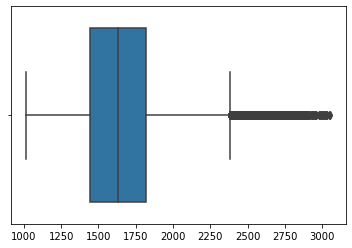

In [8]:
sns.boxplot(data.values)

Сделаем анализ пропусков как определение числа меток с отсутствующим (null) значением.


In [10]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'DUQ_MW')

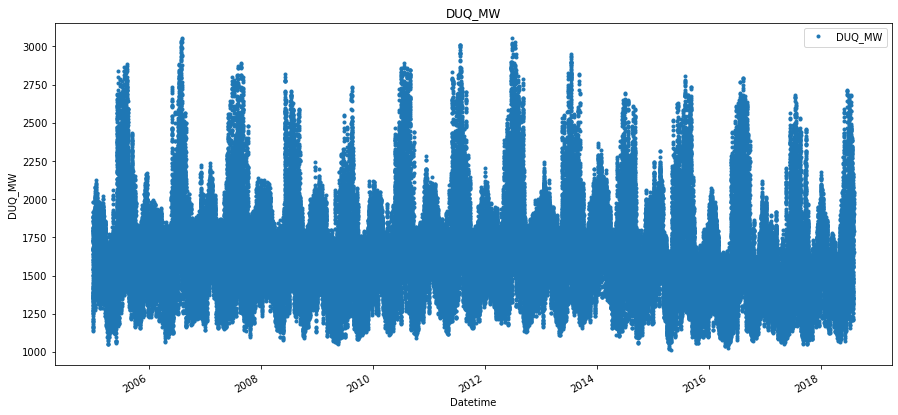

In [11]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW' )
plt.ylabel ( 'DUQ_MW' )

- Основные статистики показали, что пропусков нет

Визуальный анализ показывает что:


- Предъявленные данные имеют циклы
- Наибольшие показатели наблюдаются в 8 месяце
- Данные взяты в период с 2005-12-31 01:00:00 по 2018-01-02 00:00:00
- Интервал один час 

Посмотрим ближе на поведение ряда и для этого воспользуемся конструкцией извлечения информации из DatetimeIndex 

In [31]:
data['date'] = data.index

In [40]:
data_2009 = data.loc[data['date'].dt.year == 2009]

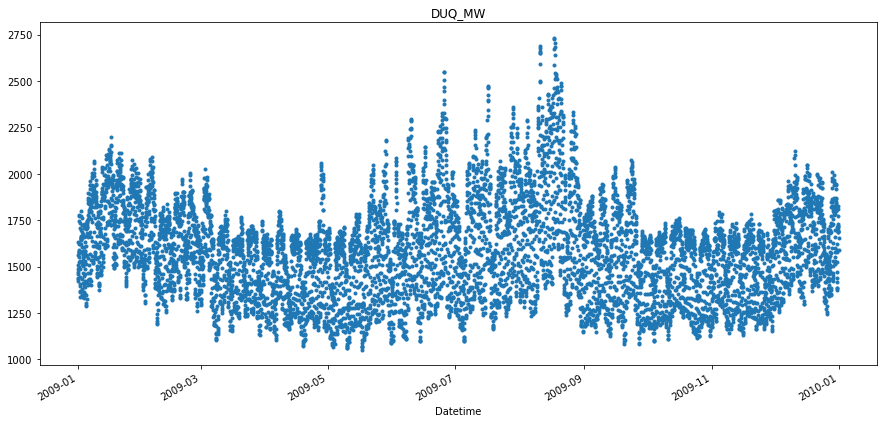

In [41]:
_ = data_2009['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW' )

Мне кажется, есть какое то странное поведение в апреле, посмотрю еще ближе 

In [42]:
data_ap = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2009 , data['date'].dt.month == 4), data['date'].dt.day > 20  )]

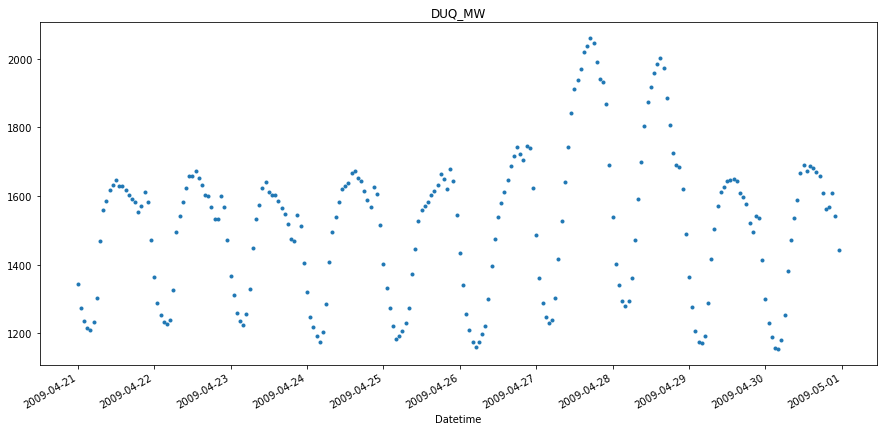

In [43]:
_ = data_ap['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW' )

In [47]:
pandas_profiling.ProfileReport(data)

Посмотрим, что за праздники были в эти дни 

In [51]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import timedelta
one_day = timedelta(days=1)
cal = calendar()

In [52]:
data['is_holiday'] = data.index.get_level_values('Datetime').isin([d.date() for d in cal.holidays()])
data['is_prev_holiday'] = data.index.get_level_values('Datetime').isin([( d.date() - one_day ) for d in cal.holidays()])
data['is_next_holiday'] = data.index.get_level_values('Datetime').isin([( d.date() + one_day ) for d in cal.holidays()])
data['is_holiday'] = data['is_holiday'].astype('uint8')
data['is_prev_holiday'] = data['is_prev_holiday'].astype('uint8')
data['is_next_holiday'] = data['is_next_holiday'].astype('uint8')

In [59]:
data.loc[np.logical_and(data['date'].dt.year == 2009,np.logical_and(data['date'].dt.month == 4, data['date'].dt.day == 28))]

,DUQ_MW,date,is_holiday,is_prev_holiday,is_next_holiday
Datetime,,,,,
2009-04-28 01:00:00,1402.0,2009-04-28 01:00:00,0,0,0
2009-04-28 02:00:00,1342.0,2009-04-28 02:00:00,0,0,0
2009-04-28 03:00:00,1294.0,2009-04-28 03:00:00,0,0,0
2009-04-28 04:00:00,1280.0,2009-04-28 04:00:00,0,0,0
2009-04-28 05:00:00,1295.0,2009-04-28 05:00:00,0,0,0
2009-04-28 06:00:00,1360.0,2009-04-28 06:00:00,0,0,0
2009-04-28 07:00:00,1473.0,2009-04-28 07:00:00,0,0,0
2009-04-28 08:00:00,1590.0,2009-04-28 08:00:00,0,0,0
2009-04-28 09:00:00,1699.0,2009-04-28 09:00:00,0,0,0


При таком приближеннии выбрасов не видно 

# Задача 3

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [60]:
df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [61]:
df.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


Видим, что пропусков нет, но данные идут не в том порядке, мне кажется мелочь, но я сделаю реверс

In [63]:
df = df.reindex(index=df.index[::-1])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


Посмотрим сразу на характеристики нашего временного ряда в смысле основных статистик (используем pd.describe())

In [65]:
df.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


Посмотрим на граффическое представление, хотя из лекции мы знаем, что это неправильный подход

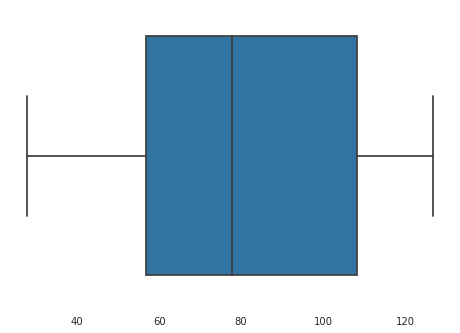

In [66]:
sns.boxplot(df.values)

Text(0, 0.5, 'Значение')

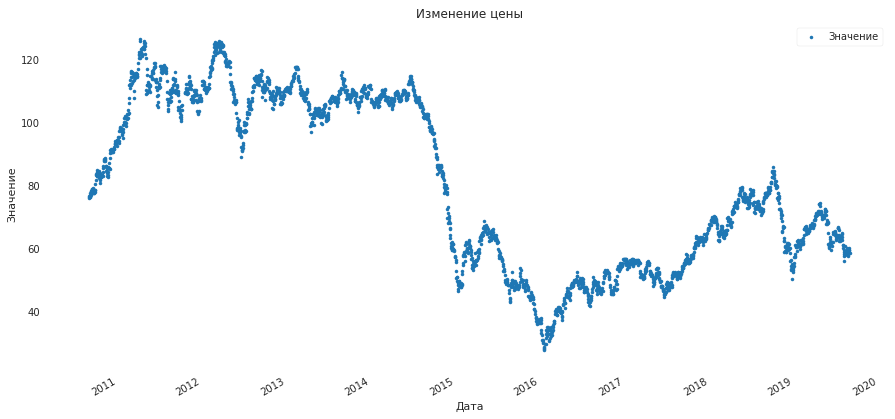

In [67]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение цены' )
plt.ylabel ( 'Значение' )

# Задача 3

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Сделаем ресемплинг по неделям

In [90]:
df_week = df.resample('W')

Text(0, 0.5, 'Долларов за барель')

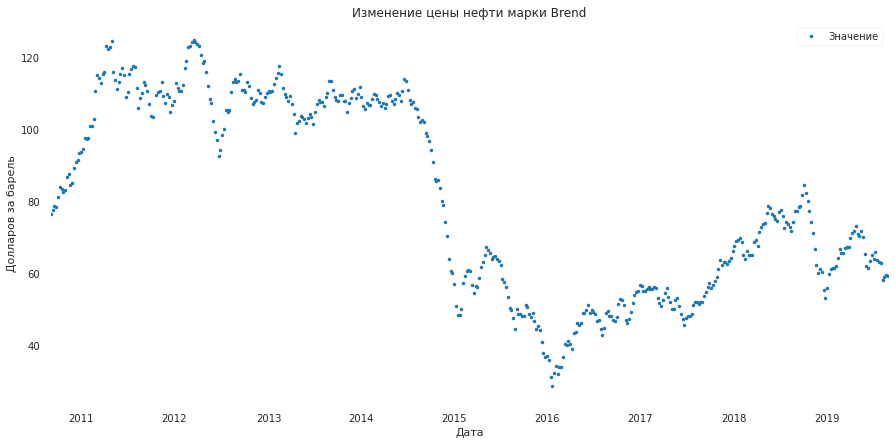

In [91]:
df_week.mean().plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение цены нефти марки Brend' )
plt.ylabel ( 'Долларов за барель' )

Text(0, 0.5, 'Долларов за барель')

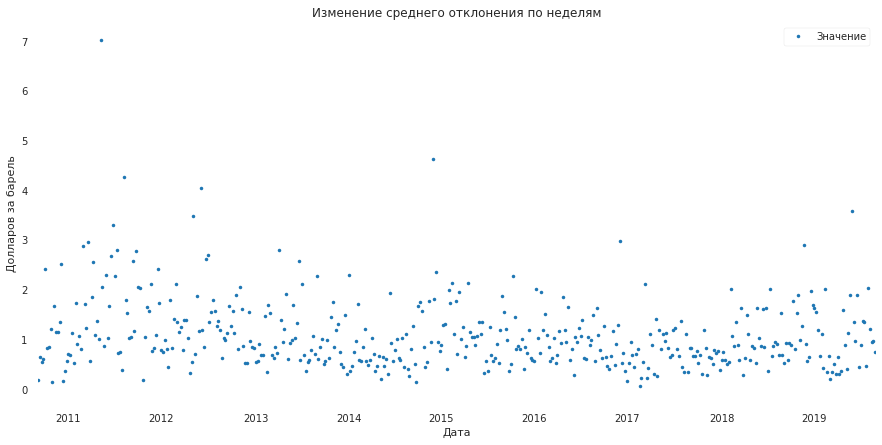

In [92]:
df_week.std().plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение среднего отклонения по неделям' )
plt.ylabel ('Долларов за барель')

 Сделаем ресемплинг по месяцам

In [93]:
df_month = df.resample('M')

Граффик среднего 

Text(0, 0.5, 'Долларов за барель')

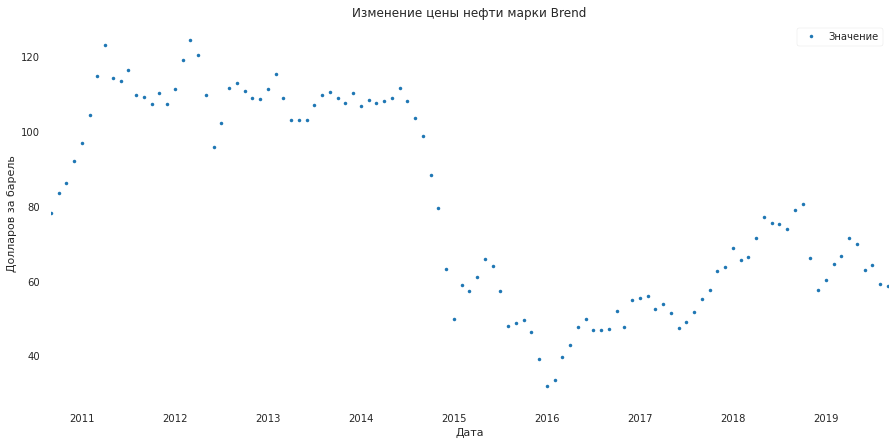

In [86]:
df_month.plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение цены нефти марки Brend' )
plt.ylabel ('Долларов за барель')

Text(0, 0.5, 'Долларов за барель')

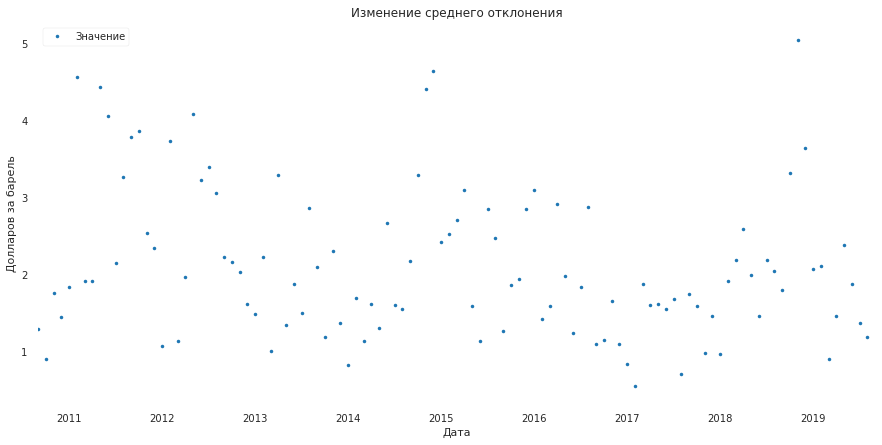

In [94]:
df_month.std().plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение среднего отклонения' )
plt.ylabel ('Долларов за барель')

In [96]:
df_year = df.resample('Y')

Text(0, 0.5, 'Долларов за барель')

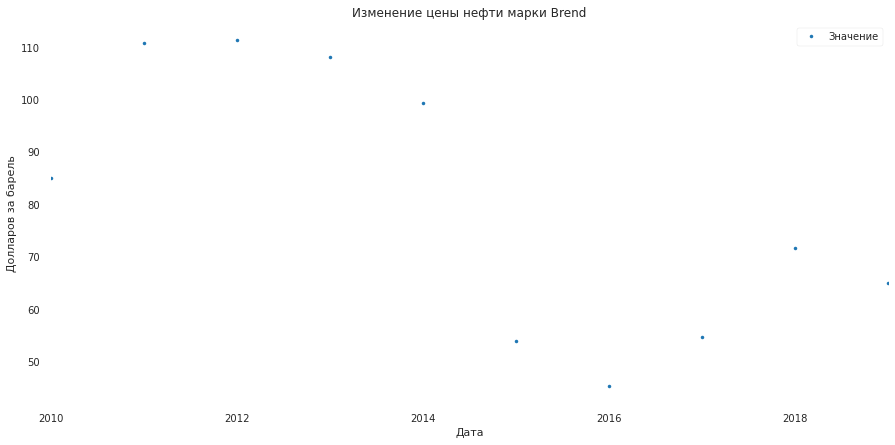

In [100]:
df_year.mean().plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение цены нефти марки Brend' )
plt.ylabel ('Долларов за барель')

Text(0, 0.5, 'Долларов за барель')

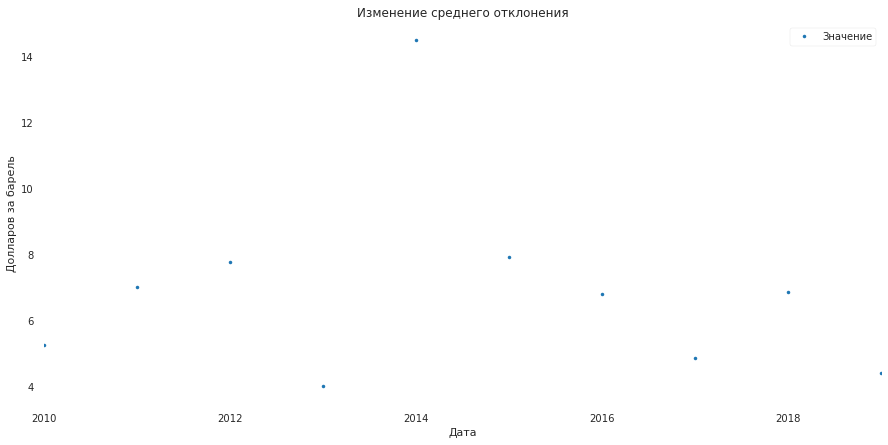

In [99]:
df_year.std().plot( style = '.', figsize = ( 15, 7 ), title = 'Изменение среднего отклонения' )
plt.ylabel ('Долларов за барель')

## Вывод

На граффиках среднего и среднего отклонения по неделям, хорошо видны переломные моменты в поведениях цен, когда рынок рос или обрушался